In [3]:
import numpy as np
from scipy.stats import kstest,ks_2samp
import pandas as pd
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19b65748>]],
      dtype=object)

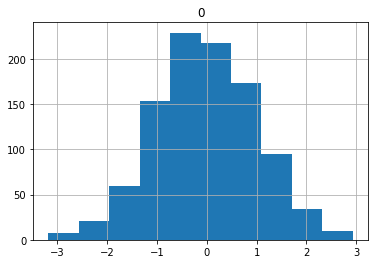

In [4]:
n=1000
x=np.random.normal(0,1,n)
pd.DataFrame(x).hist()

In [5]:
kstest(x,'uniform')#test si graph rel`vete telle distributino. si p value is high, we cannot reject the H0

KstestResult(statistic=0.516, pvalue=6.948478118859785e-248)

In [6]:
kstest(x,'norm')

KstestResult(statistic=0.02828909769824095, pvalue=0.39605995725654636)

In [7]:
kstest(x,'halfnorm')

KstestResult(statistic=0.516, pvalue=6.948478118859785e-248)

In [9]:
y=np.random.normal(0,1,n)
z=np.random.uniform(0,1,n)
df=pd.DataFrame(x)
df.rename(columns={df.columns[0]:'value'},inplace=True)

In [10]:
df.head()

,value
0,-0.152500
1,-2.812627
2,-0.335971
3,-1.309496
4,1.058540


In [11]:
df=df.sort_values(by='value').reset_index(drop=True)
df.head()

,value
0,-3.179708
1,-2.941170
2,-2.812627
3,-2.804765
4,-2.647419


In [12]:
df['prob']=1/n
df.head()

,value,prob
0,-3.179708,0.001
1,-2.941170,0.001
2,-2.812627,0.001
3,-2.804765,0.001
4,-2.647419,0.001


In [14]:
df_y=pd.DataFrame(y)
df_y.rename(columns={df_y.columns[0]:'value'},inplace=True)
df_y=df_y.sort_values(by='value').reset_index(drop=True)
df_y['prob']=1/n
df_y.head()

,value,prob
0,-3.230290,0.001
1,-2.841619,0.001
2,-2.533669,0.001
3,-2.523067,0.001
4,-2.361471,0.001


In [15]:
x_y_df=df.merge(df_y,how='outer',left_on='value',right_on='value').sort_values(by='value')
x_y_df.head()

,value,prob_x,prob_y
1000,-3.230290,NaN,0.001
0,-3.179708,0.001,NaN
1,-2.941170,0.001,NaN
1001,-2.841619,NaN,0.001
2,-2.812627,0.001,NaN


In [16]:
x_y_df=x_y_df.fillna(0)

In [19]:
x_y_df['cum_x']=x_y_df['prob_x'].cumsum()
x_y_df['cum_y']=x_y_df['prob_y'].cumsum()
x_y_df.head()

,value,prob_x,prob_y,cum_x,cum_y
0,-3.230290,0.000,0.001,0.000,0.001
1,-3.179708,0.001,0.000,0.001,0.001
2,-2.941170,0.001,0.000,0.002,0.001
3,-2.841619,0.000,0.001,0.002,0.002
4,-2.812627,0.001,0.000,0.003,0.002


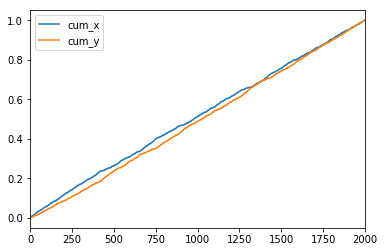

In [20]:
x_y_df=x_y_df.reset_index(drop=True)
x_y_df[['cum_x','cum_y']].plot()

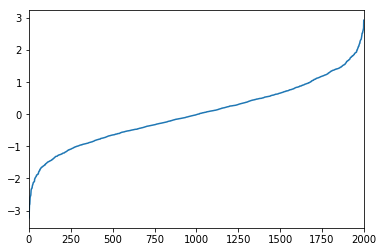

In [21]:
x_y_df.value.plot()

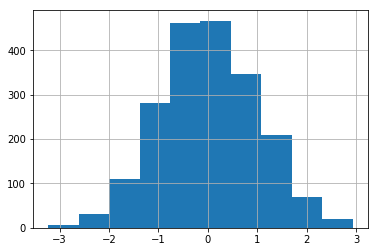

In [22]:
x_y_df.value.hist()

In [24]:
ks_2samp(x,y)

Ks_2sampResult(statistic=0.05199999999999999, pvalue=0.12984378016123646)

In [46]:
df_z=pd.DataFrame(z)
df_z.rename(columns={df_z.columns[0]:'value'},inplace=True)
df_z=df_z.sort_values(by='value').reset_index(drop=True)
df_z['prob']=1/n
df_z.head()

,value,prob
0,0.000372,0.001
1,0.001664,0.001
2,0.001753,0.001
3,0.004588,0.001
4,0.005203,0.001


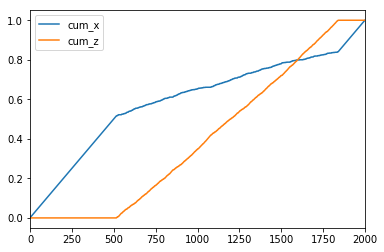

In [47]:
x_z_df=df.merge(df_z,how='outer', left_on='value', right_on='value').sort_values(by='value')
x_z_df=x_z_df.fillna(0)
x_z_df['cum_x']=x_z_df['prob_x'].cumsum()
x_z_df['cum_z']=x_z_df['prob_y'].cumsum()
x_z_df=x_z_df.reset_index(drop=True)
x_z_df[['cum_x','cum_z']].plot()

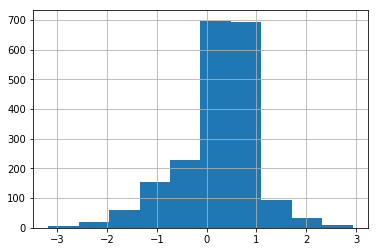

In [49]:
x_z_df.value.hist()

In [50]:
ks_2samp(x,z)

Ks_2sampResult(statistic=0.516, pvalue=2.3546247671507948e-117)

In [51]:
kstest(x_y_df.value,'norm')

KstestResult(statistic=0.01710626585712688, pvalue=0.601957296966149)

In [52]:
kstest(x_z_df.value,'norm')

KstestResult(statistic=0.24217652532927997, pvalue=9.67300449702543e-104)